In [1]:
# Code example
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


datapath = 'Jeux_de_donnees/'

# Load the data
country_stats = pd.read_csv(datapath + "50_Startups.csv", thousands=',')

country_stats

FileNotFoundError: [Errno 2] No such file or directory: 'Jeux_de_donnees/50_Startups.csv'

In [4]:
X = np.c_[country_stats[["R&D Spend", "Administration", "Marketing Spend"]]]
y = np.array(country_stats["Profit"])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=0)

X_valid, X_test, y_valid, y_test = train_test_split(
        X_test, y_test, test_size=0.5)

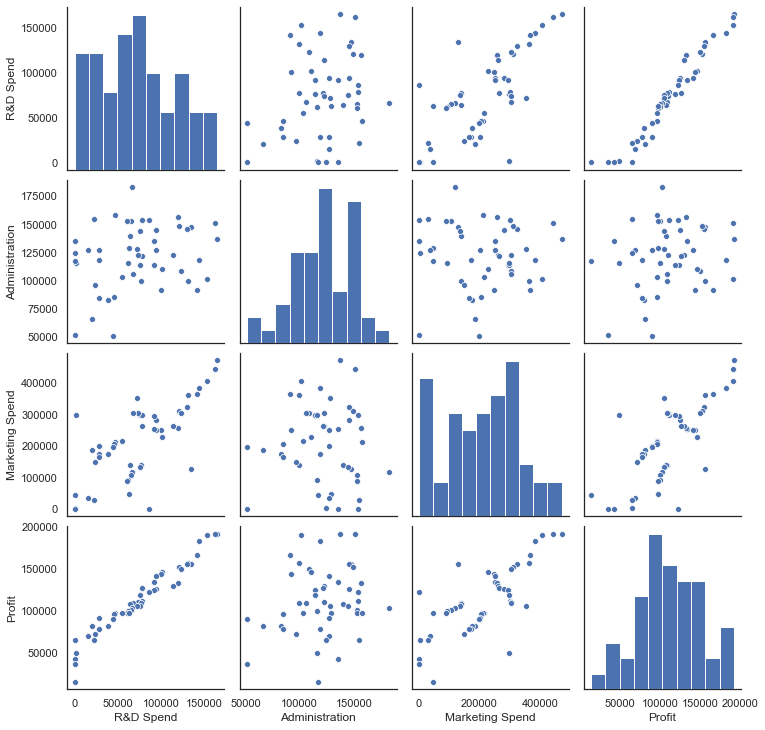

In [11]:
sns.set(style="white", color_codes=True)
sns.pairplot(data=country_stats)
plt.show()

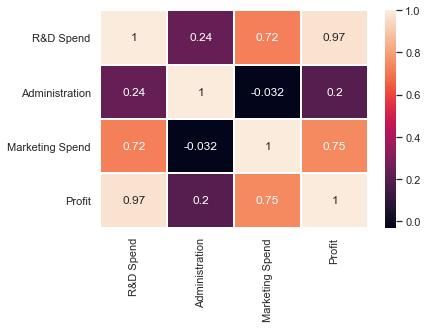

In [12]:
correlation = country_stats.corr()
plt.figure()
plt.subplot(111)
sns.heatmap(correlation, annot=True, linewidths=1.0)
plt.show()

In [15]:
# Select a linear model
model = make_pipeline(StandardScaler(),
                     SGDRegressor(max_iter=1000, alpha=0.5))
#model = sklearn.linear_model.SGDRegressor()

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [24]:
metric1 = {'modele': 'model 1',
          'mean_absolute_error': mean_absolute_error(y_valid, model.predict(X_valid)),
          'mean_squared_error': mean_squared_error(y_valid, model.predict(X_valid)),
          'r2_score':r2_score(y_valid, model.predict(X_valid))
         }

## Je teste un deuxième modèle

In [1]:
X = np.c_[country_stats[["R&D Spend", "Marketing Spend"]]]
y = np.array(country_stats["Profit"])

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=0)

X_valid, X_test, y_valid, y_test = train_test_split(
        X_test, y_test, test_size=0.5)

# Select a linear model
model = make_pipeline(StandardScaler(),
                     SGDRegressor(max_iter=1000, alpha=0.0001))
#model = sklearn.linear_model.SGDRegressor()

# Train the model
model.fit(X_train, y_train)

metric2 = {'modele': 'model 2',
          'mean_absolute_error': mean_absolute_error(y_valid, model.predict(X_valid)),
          'mean_squared_error': mean_squared_error(y_valid, model.predict(X_valid)),
          'r2_score':r2_score(y_valid, model.predict(X_valid))
         }

NameError: name 'np' is not defined

## Troisième modèle

In [32]:
X = np.c_[country_stats[["Administration", "Marketing Spend"]]]
y = np.array(country_stats["Profit"])

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=0)

X_valid, X_test, y_valid, y_test = train_test_split(
        X_test, y_test, test_size=0.5)

# Select a linear model
model = make_pipeline(StandardScaler(),
                     SGDRegressor(max_iter=1000, alpha=0.0001))
#model = sklearn.linear_model.SGDRegressor()

# Train the model
model.fit(X_train, y_train)

metric3 = {'modele': 'model 3',
          'mean_absolute_error': mean_absolute_error(y_valid, model.predict(X_valid)),
          'mean_squared_error': mean_squared_error(y_valid, model.predict(X_valid)),
          'r2_score':r2_score(y_valid, model.predict(X_valid))
         }

## Quatrième modèle

In [33]:
X = np.c_[country_stats[["R&D Spend", "Administration"]]]
y = np.array(country_stats["Profit"])

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=0)

X_valid, X_test, y_valid, y_test = train_test_split(
        X_test, y_test, test_size=0.5)

# Select a linear model
model = make_pipeline(StandardScaler(),
                     SGDRegressor(max_iter=1000, alpha=0.0001))
#model = sklearn.linear_model.SGDRegressor()

# Train the model
model.fit(X_train, y_train)

metric4 = {'modele': 'model 4',
          'mean_absolute_error': mean_absolute_error(y_valid, model.predict(X_valid)),
          'mean_squared_error': mean_squared_error(y_valid, model.predict(X_valid)),
          'r2_score':r2_score(y_valid, model.predict(X_valid))
         }

In [35]:
metric = pd.DataFrame([
    metric1, metric2, metric3, metric4])

In [36]:
metric

,modele,mean_absolute_error,mean_squared_error,r2_score
0,model 1,7188.578014,9.454197e+07,0.889947
1,model 2,7379.235418,6.563457e+07,0.965552
2,model 3,17567.254799,5.771201e+08,0.626518
3,model 4,7691.656109,8.660698e+07,0.939277


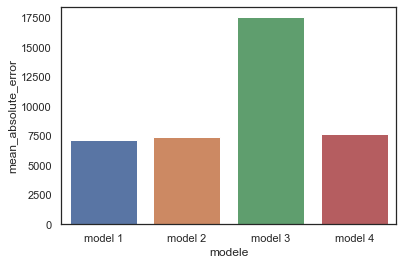

In [37]:
ax = sns.barplot(x="modele", y="mean_absolute_error", data=metric)

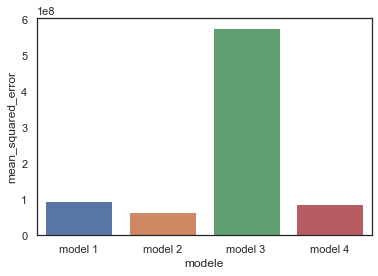

In [38]:
ax = sns.barplot(x="modele", y="mean_squared_error", data=metric)

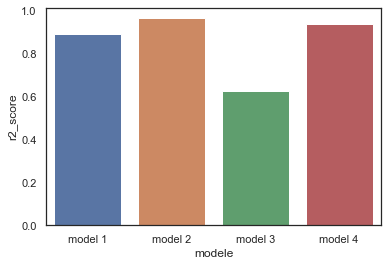

In [39]:
ax = sns.barplot(x="modele", y="r2_score", data=metric)

## Regression polynomial

In [93]:
from sklearn.preprocessing import PolynomialFeatures

X = np.c_[country_stats[["R&D Spend", "Administration", "Marketing Spend"]]]
y = np.array(country_stats["Profit"])

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)


In [56]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=0)

X_valid, X_test, y_valid, y_test = train_test_split(
        X_test, y_test, test_size=0.5)

In [62]:
model = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2, include_bias=False),
                     SGDRegressor(max_iter=1000, alpha=0.1))

model.fit(X_train, y_train)

metric_poly2 = {'modele': 'model_ploy3',
          'mean_absolute_error': mean_absolute_error(y_valid, model.predict(X_valid)),
          'mean_squared_error': mean_squared_error(y_valid, model.predict(X_valid)),
          'r2_score':r2_score(y_valid, model.predict(X_valid))
         }

In [63]:
metric_poly1

{'modele': 'model_ploy1',
 'mean_absolute_error': 9218.9307475848,
 'mean_squared_error': 129430082.55214493,
 'r2_score': 0.8614611619717356}

In [90]:
model = make_pipeline(StandardScaler(),
                      PolynomialFeatures(degree=4, include_bias=False),
                     SGDRegressor(max_iter=1000, alpha=0.1))

model.fit(X_train, y_train)

metric_poly3 = {'modele': 'model_ploy3',
          'mean_absolute_error': mean_absolute_error(y_valid, model.predict(X_valid)),
          'mean_squared_error': mean_squared_error(y_valid, model.predict(X_valid)),
          'r2_score':r2_score(y_valid, model.predict(X_valid))
         }

In [91]:
metric_poly3

{'modele': 'model_ploy3',
 'mean_absolute_error': 1175196715717.869,
 'mean_squared_error': 5.782978890163137e+24,
 'r2_score': -6189961097045638.0}

## Regression regularisé

#### Modèle Ridge

In [95]:
model = make_pipeline(StandardScaler(),
                     SGDRegressor(max_iter=1000,
                                  alpha=0.1,
                                  penalty = 'l2'))

model.fit(X_train, y_train)

metric_Ridge1 = {'modele': 'model_Ridge1',
          'mean_absolute_error': mean_absolute_error(y_valid, model.predict(X_valid)),
          'mean_squared_error': mean_squared_error(y_valid, model.predict(X_valid)),
          'r2_score':r2_score(y_valid, model.predict(X_valid))
         }

metric_Ridge1

{'modele': 'model_Ridge1',
 'mean_absolute_error': 6783.990653903539,
 'mean_squared_error': 82814684.60064533,
 'r2_score': 0.9113571594020399}

#### Modèle Lasso

In [94]:
model = make_pipeline(StandardScaler(),
                     SGDRegressor(max_iter=1000,
                                  alpha=0.1,
                                  penalty = 'l1'))

model.fit(X_train, y_train)

metric_Lasso1 = {'modele': 'model_Lasso1',
          'mean_absolute_error': mean_absolute_error(y_valid, model.predict(X_valid)),
          'mean_squared_error': mean_squared_error(y_valid, model.predict(X_valid)),
          'r2_score':r2_score(y_valid, model.predict(X_valid))
         }

metric_Lasso1

{'modele': 'model_Lasso1',
 'mean_absolute_error': 5362.276278243982,
 'mean_squared_error': 42057174.94418253,
 'r2_score': 0.9549830145154155}

#### Modèle Elasticnet

In [98]:
model = make_pipeline(StandardScaler(),
                     SGDRegressor(max_iter=1000,
                                  alpha=0.1,
                                  penalty = 'elasticnet',
                                  l1_ratio=0.7))

model.fit(X_train, y_train)

metric_ElasticNet1 = {'modele': 'model_ElasticNet1',
          'mean_absolute_error': mean_absolute_error(y_valid, model.predict(X_valid)),
          'mean_squared_error': mean_squared_error(y_valid, model.predict(X_valid)),
          'r2_score':r2_score(y_valid, model.predict(X_valid))
         }

metric_ElasticNet1

{'modele': 'model_ElasticNet1',
 'mean_absolute_error': 5370.139313088353,
 'mean_squared_error': 42168762.82087571,
 'r2_score': 0.9548635735441182}